# Pymaceuticals Inc.
---

### Analysis

- Based on the pie charts, there is a nearly equal distribution between female and male mice (49.4% and 50.6%, respectively).
- Based on the box plots, it appears the Capomulin and Ramicane are the most effective of the four drug treatments at reducing tumor volume.
- Based on the Capomulin linear regression analysis, resulting in a correlation coefficient of 0.84, it seems that there is a positive correlation between mouse weight and the average tumor volume.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import sem

In [ ]:
# Study data files
mouse_metadata_path = "../Starter_Code/data/Mouse_metadata.csv"
study_results_path = "../Starter_Code/data/Study_results.csv"

In [ ]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata.head()
# study_results.head()

In [ ]:
# Combine the data into a single DataFrame
merged_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_mouse_df.head()

In [ ]:
# Check total number of rows
merged_mouse_df.info()

In [ ]:
# Check the number of mice
merged_mice_count = len(merged_mouse_df["Mouse ID"].unique())
merged_mice_count

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = merged_mouse_df[merged_mouse_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mouse_df

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_mouse_df = merged_mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first", inplace=False, ignore_index=False)
cleaned_mouse_df.head()

In [ ]:
# Check total number of rows
cleaned_mouse_df.info()

In [ ]:
# Check the number of mice in the clean DataFrame
cleaned_mouse_count = len(cleaned_mouse_df["Mouse ID"].unique())
cleaned_mouse_count

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_drug_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_drug_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_tumor_drug_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sd_tumor_drug_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_tumor_drug_regimen = cleaned_mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_drug_regimen,
    'Median Tumor Volume': median_tumor_drug_regimen,
    'Tumor Volume Variance': var_tumor_drug_regimen,
    'Tumor Volume Std. Dev': sd_tumor_drug_regimen,
    'Tumor Volume Std. Err.': sem_tumor_drug_regimen
}).reset_index()

drug_regimen_df

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_mice_count_df = pd.DataFrame(cleaned_mouse_df.groupby(['Drug Regimen']).count()['Mouse ID'])
drug_reg_mice_count_df = drug_reg_mice_count_df.sort_values(by=['Mouse ID'], ascending=False).reset_index()
# drug_reg_mice_count_df

pandas_bar_chart = drug_reg_mice_count_df.plot.bar(x='Drug Regimen', y='Mouse ID', rot=90, legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
# plt.savefig('pandas_bar_chart')

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(drug_reg_mice_count_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_reg_mice_count_df['Mouse ID'], alpha=1, align='center')
plt.xticks(tick_locations, drug_reg_mice_count_df['Drug Regimen'], rotation="vertical")

plt.xlim(-0.75, len(drug_reg_mice_count_df)-0.25)
plt.ylim(0, max(drug_reg_mice_count_df['Mouse ID'])+20)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

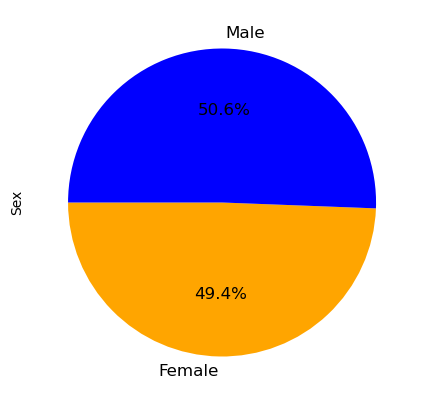

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_df1 = merged_mouse_df.groupby("Sex")
mice_gender_count = mice_gender_df1["Sex"].count()

colors = ["orange", "blue"]
gender_plot = mice_gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", startangle=180, fontsize=12, figsize=(5, 5), colors=colors)


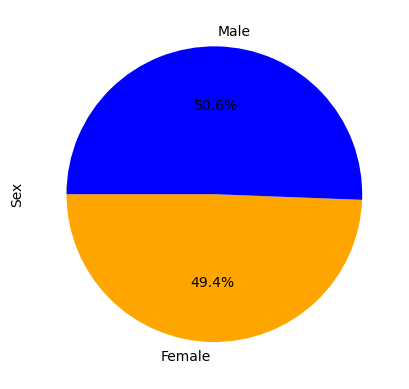

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df2 = pd.DataFrame(merged_mouse_df.groupby('Sex').count()).reset_index()

sizes = [x for x in mice_gender_df2['Mouse ID']]
labels = [y for y in mice_gender_df2['Sex']]
colors = ["orange", "blue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = merged_mouse_df.groupby('Mouse ID')
greatest_timepoint = greatest_timepoint['Timepoint'].max()
greatest_timepoint_timepoint_df = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(greatest_timepoint_timepoint_df, merged_mouse_df, on = ['Mouse ID','Timepoint'])
tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
cap_tumor_vol = []
ram_tumor_vol = []
inf_tumor_vol = []
cef_tumor_vol = []

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        cap_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        ram_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        inf_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        cef_tumor_vol.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

# Put four tumor vol lists into a list for for loop
tumor_vol_list = [cap_tumor_vol, ram_tumor_vol, inf_tumor_vol, cef_tumor_vol]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol_list)):
    quartiles = pd.Series(tumor_vol_list[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"\n{drug_treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for j in range(len(tumor_vol_list[i])):

        # Determine outliers using upper and lower bounds
        if (tumor_vol_list[i][j] < lower_bound) or (tumor_vol_list[i][j] > upper_bound):
            outlier = tumor_vol_list[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.3213458].

Ceftamin:
Th

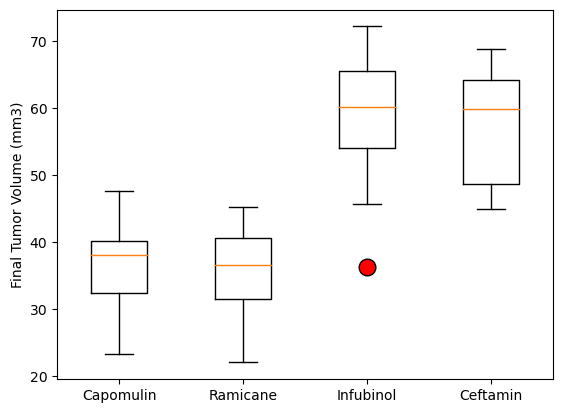

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_list, flierprops = dict(markerfacecolor = "r", markersize=12))
ax1.set_xticklabels(drug_treatments)
plt.show()

## Line and Scatter Plots

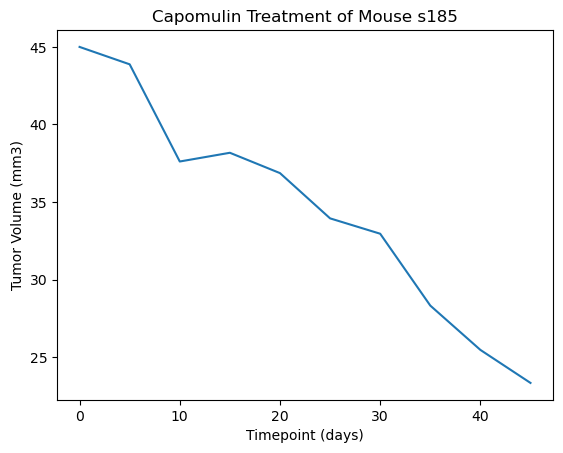

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185_df = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == "Capomulin"].loc[capomulin_df['Mouse ID'] == "s185"]
# mouse_s185_df

s185_x_axis = mouse_s185_df['Timepoint']
s185_points = mouse_s185_df['Tumor Volume (mm3)']

plt.plot(s185_x_axis, s185_points)
plt.title("Capomulin Treatment of Mouse s185", fontsize = 12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

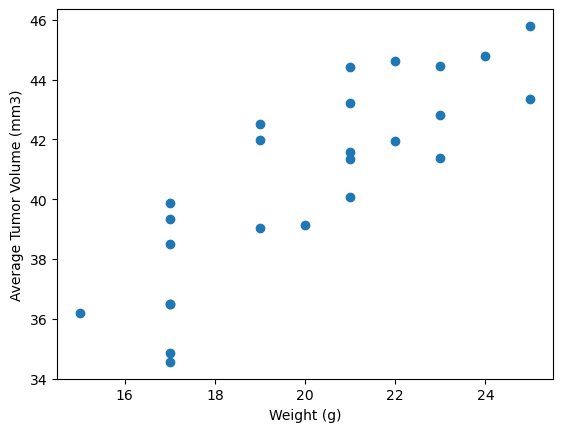

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = merged_mouse_df.loc[merged_mouse_df['Drug Regimen'] == "Capomulin"].groupby('Mouse ID')
avg_tumor_capomulin = capomulin_df['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df['Weight (g)'].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


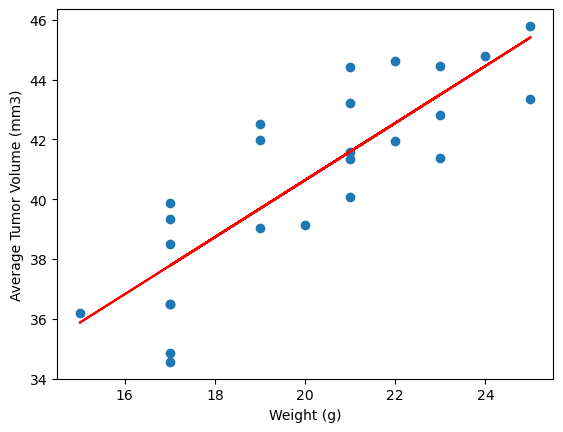

In [100]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)

correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)

regress_values = mouse_weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()